# Машинное обучение, ФКН ВШЭ

# Практическое задание 7. Бустинговое

## Общая информация

Дата выдачи: 13.12.2022

Мягкий дедлайн: 20.12.2022 23:59 MSK

Жёсткий дедлайн: 20.12.2022 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-07-Username.ipynb

Username — ваша фамилия на латинице

## О задании

В этом задании вам предстоит вручную запрограммировать один из самых мощных алгоритмов машинного обучения — бустинг.

In [62]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 10, 7
plt.rcParams['font.size'] = 12
sns.set(style='darkgrid')
filterwarnings('ignore')

In [59]:
x = load_npz('x.npz')
y = np.load('y.npy')

Разделим на обучающую, валидационную и тестовую выборки (`random_state` оставьте равным 1337 для воспроизводимости).

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1337)

x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.5, random_state=1337)

x_train.shape, x_valid.shape, x_test.shape

((18825, 169), (2354, 169), (2353, 169))

## Задание 1. Реализация градиентного бустингового (4 балла)

Вам нужно дописать код в файлике `boosting.py`. Для вас уже подготовлен шаблон класса `Boosting`, вы можете менять его по своему усмотрению.

### Инструкции для функций:

#### `__init__`

В `__init__` приходит кучка параметров, распишем что есть что:

 - `base_model_class` - класс базовой модели нашего бустинга
 - `base_model_params` - словарь с гиперпараметрами для базовой модели
 - `n_estimators` - какое количество базовых моделей нужно обучить
 - `learning_rate` - темп обучения, должен быть из полуинтервала $(0, 1]$
 - `subsample` - доля объектов, на которой будет обучаться базовая модель (какую часть составляет бутстрапная выборка от исходной обучающей)
 - `early_stopping_rounds` - число итераций, после которых при отсутствии улучшения качества на валидационной выборке обучение останавливается
 - `plot` - строить ли после обучения всех базовых моделей график с качеством

#### `fit`

В `fit` приходит две выборки, обучающая и валидационная. На обучающей мы обучаем новые базовые модели, на валидационной считаем качество для ранней остановки (если это предусматривают параметры).

Сначала нам нужно сделать какую-то нулевую модель, сделать предсказания для обучающей и валидационной выборок (в шаблоне это нулевая модель, соответственно предсказания это просто `np.zeros`). После этого нужно обучить `n_estimators` базовых моделей (как и на что обучаются базовые модели смотрите в лекциях и семинарах). После каждой обученной базовой модели мы должны обновить текущие предсказания, посчитать ошибку на обучающей и валидационной выборках (используем `loss_fn` для этого), проверить на раннюю остановку.

После всего цикла обучения надо нарисовать график (если `plot`).


#### `fit_new_base_model`

В `fit_new_base_model` приходит обучающая выборка (целиком) и текущие предсказания для неё. Мы должны сгенерировать бутстрап выборку для обучения базовой модели и обучить базовую модель. После обучения модели запускаем поиск оптимальной гаммы, добавляем новую модель и гамму (не забываем про темп обучения) в соответствующие списки.

#### `predict_proba`

В `predict_proba` приходит выборка, нужно предсказать вероятности для неё. Суммируем предсказания базовых моделей на этой выборке (не забываем про гаммы) и накидываем сигмоиду.

In [10]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
%autoreload 2

from boosting import Boosting

### Проверка кода

У автора задания всё учится около одной секунды.

In [46]:
boosting = Boosting()

%time boosting.fit(x_train, y_train, x_valid, y_valid)



assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(x_test).shape == (x_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

CPU times: user 709 ms, sys: 5.85 ms, total: 715 ms
Wall time: 715 ms
Train ROC-AUC 0.9919
Valid ROC-AUC 0.9115
Test ROC-AUC 0.9122


## Задание 2. Обучение градиентного бустингового (1 балл)

Оцените качество на тестовой выборке вашей имплементации бустинга для различной максимальной глубины решающего дерева в качестве базовой модели. Здесь и далее мы будем использовать метрику ROC-AUC.

Перебирайте максимальную глубину от 1 до 30 с шагом 2 (остальные параметры бустинга стоит оставить равными по умолчанию). Постройте график зависимости качества на обучающей и тестовой выборке в зависимости от глубины.

  0%|          | 0/15 [00:00<?, ?it/s]

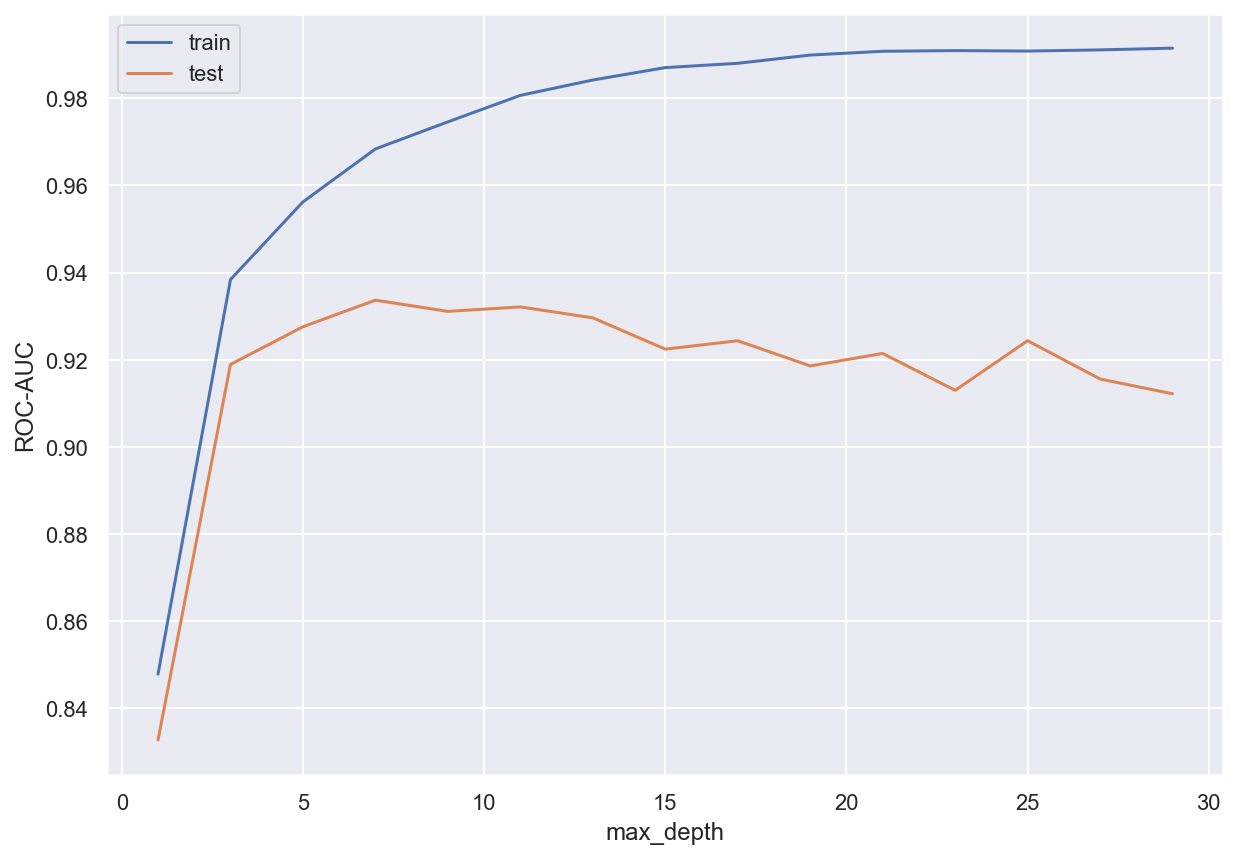

In [69]:
results = {}
results['train'] = []
results['test'] = []
best_model = -1
best_res = -1
depths = range(1, 30, 2)

i = 0
for depth in tqdm(depths):
    boosting = Boosting(base_model_params= {'max_depth': depth})
    boosting.fit(x_train, y_train, x_test, y_test)
    results['train'].append(boosting.score(x_train, y_train))
    results['test'].append(boosting.score(x_test, y_test))
    if results['test'][-1] > best_res:
        best_res = results['test'][-1]
        best_model = (depth + 1) / 2
    
plt.plot(depths, results['train'])
plt.plot(depths, results['test'])
plt.xlabel('max_depth')
plt.ylabel('ROC-AUC')
plt.legend(['train', 'test'])
plt.show()

**Какая из моделей имеет лучшее качество? Как вы можете это объяснить?**

Лучшее качество имеет модель с максимальным ROC-AUC на test:

In [72]:
print('Лучшая модель:', best_model)
print('Глубина для этой модели:', best_model * 2 - 1)

Лучшая модель: 4.0
Глубина для этой модели: 7.0


Если использовать большую глубину, то каждая модель будет переобучаться, что приведет к переобучению всего бустинга(на графике это видно). Вообще на лекциях вроде говорили, что глубина 2-4 - хороший выбор для внутренних моделей

## Задание 3. Подбираем гиперпараметры и ищем лучшую модель (3 балла)

Подберите по валидационной выборке основные гиперпараметры для вашей модели бустинга. Следует подобрать все основные параметры для самого градиентного бустинга и для самих базовых моделей. Существуют библиотеки для подбора гиперпараметров, попробуйте использовать какую-нибудь из следующих двух - [Hyperopt](https://github.com/hyperopt/hyperopt), [Optuna](https://optuna.org/).

In [96]:
import optuna

def objective(trial):
    rf_max_depth = trial.suggest_int("rf_max_depth", 2, 10, 1)
    rf_min_samples_leaf = trial.suggest_int("rf_min_samples_leaf", 1, 20, 4)
    rf_min_samples_split = trial.suggest_int("rf_min_samples_split", 2, 50, 8)
    rf_n_estimators = trial.suggest_int("rf_n_estimators", 10, 100, 10)
    rf_learning_rate = trial.suggest_float("rf_learning_rate", 0.1, 1, step=0.1)
    rf_subsample = trial.suggest_float("rf_subsample", 0.5, 0.8, step=0.1)
    
    boosting = Boosting(base_model_params={'max_depth': rf_max_depth,
                                           'min_samples_leaf': rf_min_samples_leaf,
                                           'min_samples_split': rf_min_samples_split},
                        n_estimators=rf_n_estimators, 
                        learning_rate=rf_learning_rate, 
                        subsample=rf_subsample)
    boosting.fit(x_train, y_train, x_valid, y_valid)
    return boosting.score(x_valid, y_valid)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=300, show_progress_bar=True, gc_after_trial=True)
study.best_params

[I 2022-12-21 22:55:43,561] A new study created in memory with name: no-name-c1645fe9-4725-419f-bb64-0f5e8abbed26


  0%|          | 0/300 [00:00<?, ?it/s]

[I 2022-12-21 22:55:44,508] Trial 0 finished with value: 0.921297571184667 and parameters: {'rf_max_depth': 3, 'rf_min_samples_leafs': 5, 'rf_min_samples_split': 2, 'rf_n_estimators': 40, 'rf_learning_rate': 0.1, 'rf_subsample': 0.6}. Best is trial 0 with value: 0.921297571184667.
[I 2022-12-21 22:55:45,959] Trial 1 finished with value: 0.929091107913026 and parameters: {'rf_max_depth': 4, 'rf_min_samples_leafs': 9, 'rf_min_samples_split': 10, 'rf_n_estimators': 50, 'rf_learning_rate': 0.1, 'rf_subsample': 0.6}. Best is trial 1 with value: 0.929091107913026.
[I 2022-12-21 22:55:47,483] Trial 2 finished with value: 0.9282430299968152 and parameters: {'rf_max_depth': 3, 'rf_min_samples_leafs': 5, 'rf_min_samples_split': 34, 'rf_n_estimators': 50, 'rf_learning_rate': 0.2, 'rf_subsample': 0.7}. Best is trial 1 with value: 0.929091107913026.
[I 2022-12-21 22:55:49,714] Trial 3 finished with value: 0.9395326432174121 and parameters: {'rf_max_depth': 5, 'rf_min_samples_leafs': 5, 'rf_min_samp

[I 2022-12-21 22:56:26,561] Trial 28 finished with value: 0.9405974299846827 and parameters: {'rf_max_depth': 6, 'rf_min_samples_leafs': 9, 'rf_min_samples_split': 42, 'rf_n_estimators': 50, 'rf_learning_rate': 0.4, 'rf_subsample': 0.7}. Best is trial 24 with value: 0.9411569618616368.
[I 2022-12-21 22:56:28,117] Trial 29 finished with value: 0.9397214153841733 and parameters: {'rf_max_depth': 9, 'rf_min_samples_leafs': 17, 'rf_min_samples_split': 34, 'rf_n_estimators': 30, 'rf_learning_rate': 0.5, 'rf_subsample': 0.6}. Best is trial 24 with value: 0.9411569618616368.
[I 2022-12-21 22:56:29,850] Trial 30 finished with value: 0.9401053452455355 and parameters: {'rf_max_depth': 7, 'rf_min_samples_leafs': 9, 'rf_min_samples_split': 50, 'rf_n_estimators': 40, 'rf_learning_rate': 0.30000000000000004, 'rf_subsample': 0.6}. Best is trial 24 with value: 0.9411569618616368.
[I 2022-12-21 22:56:31,500] Trial 31 finished with value: 0.9407391088836261 and parameters: {'rf_max_depth': 7, 'rf_min_s

[I 2022-12-21 22:57:21,153] Trial 56 finished with value: 0.941756403287589 and parameters: {'rf_max_depth': 5, 'rf_min_samples_leafs': 1, 'rf_min_samples_split': 26, 'rf_n_estimators': 60, 'rf_learning_rate': 0.7, 'rf_subsample': 0.7}. Best is trial 51 with value: 0.9422229459153774.
[I 2022-12-21 22:57:22,855] Trial 57 finished with value: 0.9393303018039914 and parameters: {'rf_max_depth': 4, 'rf_min_samples_leafs': 1, 'rf_min_samples_split': 18, 'rf_n_estimators': 50, 'rf_learning_rate': 0.6, 'rf_subsample': 0.7}. Best is trial 51 with value: 0.9422229459153774.
[I 2022-12-21 22:57:24,679] Trial 58 finished with value: 0.9375790707939526 and parameters: {'rf_max_depth': 3, 'rf_min_samples_leafs': 1, 'rf_min_samples_split': 26, 'rf_n_estimators': 60, 'rf_learning_rate': 0.6, 'rf_subsample': 0.7}. Best is trial 51 with value: 0.9422229459153774.
[I 2022-12-21 22:57:26,558] Trial 59 finished with value: 0.9420130216876471 and parameters: {'rf_max_depth': 5, 'rf_min_samples_leafs': 5, 

[I 2022-12-21 22:58:19,024] Trial 84 finished with value: 0.9429026055348159 and parameters: {'rf_max_depth': 6, 'rf_min_samples_leafs': 5, 'rf_min_samples_split': 42, 'rf_n_estimators': 60, 'rf_learning_rate': 0.7, 'rf_subsample': 0.7}. Best is trial 80 with value: 0.9439574149148371.
[I 2022-12-21 22:58:21,348] Trial 85 finished with value: 0.9416957407731118 and parameters: {'rf_max_depth': 6, 'rf_min_samples_leafs': 5, 'rf_min_samples_split': 42, 'rf_n_estimators': 60, 'rf_learning_rate': 0.7, 'rf_subsample': 0.7}. Best is trial 80 with value: 0.9439574149148371.
[I 2022-12-21 22:58:23,653] Trial 86 finished with value: 0.9405080325949269 and parameters: {'rf_max_depth': 6, 'rf_min_samples_leafs': 5, 'rf_min_samples_split': 42, 'rf_n_estimators': 60, 'rf_learning_rate': 0.7, 'rf_subsample': 0.7}. Best is trial 80 with value: 0.9439574149148371.
[I 2022-12-21 22:58:26,274] Trial 87 finished with value: 0.942273631042605 and parameters: {'rf_max_depth': 6, 'rf_min_samples_leafs': 5, 

[I 2022-12-21 22:59:29,168] Trial 112 finished with value: 0.941562442879458 and parameters: {'rf_max_depth': 8, 'rf_min_samples_leafs': 5, 'rf_min_samples_split': 42, 'rf_n_estimators': 60, 'rf_learning_rate': 0.7, 'rf_subsample': 0.7}. Best is trial 80 with value: 0.9439574149148371.
[I 2022-12-21 22:59:31,728] Trial 113 finished with value: 0.9426072748722296 and parameters: {'rf_max_depth': 7, 'rf_min_samples_leafs': 5, 'rf_min_samples_split': 42, 'rf_n_estimators': 60, 'rf_learning_rate': 0.7, 'rf_subsample': 0.7}. Best is trial 80 with value: 0.9439574149148371.
[I 2022-12-21 22:59:34,024] Trial 114 finished with value: 0.9423231188833628 and parameters: {'rf_max_depth': 6, 'rf_min_samples_leafs': 5, 'rf_min_samples_split': 42, 'rf_n_estimators': 60, 'rf_learning_rate': 0.7, 'rf_subsample': 0.7}. Best is trial 80 with value: 0.9439574149148371.
[I 2022-12-21 22:59:36,598] Trial 115 finished with value: 0.9417384439905397 and parameters: {'rf_max_depth': 7, 'rf_min_samples_leafs':

[I 2022-12-21 23:00:37,611] Trial 140 finished with value: 0.9419383908310205 and parameters: {'rf_max_depth': 6, 'rf_min_samples_leafs': 5, 'rf_min_samples_split': 42, 'rf_n_estimators': 60, 'rf_learning_rate': 0.7, 'rf_subsample': 0.7}. Best is trial 80 with value: 0.9439574149148371.
[I 2022-12-21 23:00:39,954] Trial 141 finished with value: 0.9434246224357117 and parameters: {'rf_max_depth': 6, 'rf_min_samples_leafs': 5, 'rf_min_samples_split': 42, 'rf_n_estimators': 60, 'rf_learning_rate': 0.7, 'rf_subsample': 0.7}. Best is trial 80 with value: 0.9439574149148371.
[I 2022-12-21 23:00:42,371] Trial 142 finished with value: 0.9417911245952173 and parameters: {'rf_max_depth': 6, 'rf_min_samples_leafs': 5, 'rf_min_samples_split': 42, 'rf_n_estimators': 60, 'rf_learning_rate': 0.7, 'rf_subsample': 0.7}. Best is trial 80 with value: 0.9439574149148371.
[I 2022-12-21 23:00:44,794] Trial 143 finished with value: 0.9416634140384234 and parameters: {'rf_max_depth': 6, 'rf_min_samples_leafs'

[I 2022-12-21 23:01:45,751] Trial 168 finished with value: 0.9413708770442669 and parameters: {'rf_max_depth': 5, 'rf_min_samples_leafs': 5, 'rf_min_samples_split': 42, 'rf_n_estimators': 60, 'rf_learning_rate': 0.7, 'rf_subsample': 0.7}. Best is trial 80 with value: 0.9439574149148371.
[I 2022-12-21 23:01:48,087] Trial 169 finished with value: 0.942315136973563 and parameters: {'rf_max_depth': 6, 'rf_min_samples_leafs': 5, 'rf_min_samples_split': 42, 'rf_n_estimators': 60, 'rf_learning_rate': 0.7, 'rf_subsample': 0.7}. Best is trial 80 with value: 0.9439574149148371.
[I 2022-12-21 23:01:50,430] Trial 170 finished with value: 0.9421930137536288 and parameters: {'rf_max_depth': 6, 'rf_min_samples_leafs': 5, 'rf_min_samples_split': 42, 'rf_n_estimators': 60, 'rf_learning_rate': 0.7, 'rf_subsample': 0.7}. Best is trial 80 with value: 0.9439574149148371.
[I 2022-12-21 23:01:53,022] Trial 171 finished with value: 0.9438213233527534 and parameters: {'rf_max_depth': 7, 'rf_min_samples_leafs':

[I 2022-12-21 23:02:57,258] Trial 196 finished with value: 0.9412762914131413 and parameters: {'rf_max_depth': 8, 'rf_min_samples_leafs': 5, 'rf_min_samples_split': 42, 'rf_n_estimators': 60, 'rf_learning_rate': 0.7, 'rf_subsample': 0.7}. Best is trial 80 with value: 0.9439574149148371.
[I 2022-12-21 23:02:59,867] Trial 197 finished with value: 0.942771303118612 and parameters: {'rf_max_depth': 7, 'rf_min_samples_leafs': 5, 'rf_min_samples_split': 42, 'rf_n_estimators': 60, 'rf_learning_rate': 0.7, 'rf_subsample': 0.7}. Best is trial 80 with value: 0.9439574149148371.
[I 2022-12-21 23:03:02,476] Trial 198 finished with value: 0.9426312206016285 and parameters: {'rf_max_depth': 7, 'rf_min_samples_leafs': 5, 'rf_min_samples_split': 42, 'rf_n_estimators': 60, 'rf_learning_rate': 0.7, 'rf_subsample': 0.7}. Best is trial 80 with value: 0.9439574149148371.
[I 2022-12-21 23:03:05,061] Trial 199 finished with value: 0.9428140063360401 and parameters: {'rf_max_depth': 7, 'rf_min_samples_leafs':

[I 2022-12-21 23:04:04,420] Trial 224 finished with value: 0.942294783103574 and parameters: {'rf_max_depth': 6, 'rf_min_samples_leafs': 5, 'rf_min_samples_split': 42, 'rf_n_estimators': 60, 'rf_learning_rate': 0.7, 'rf_subsample': 0.7}. Best is trial 80 with value: 0.9439574149148371.
[I 2022-12-21 23:04:06,726] Trial 225 finished with value: 0.9423909651166595 and parameters: {'rf_max_depth': 6, 'rf_min_samples_leafs': 5, 'rf_min_samples_split': 42, 'rf_n_estimators': 60, 'rf_learning_rate': 0.7, 'rf_subsample': 0.7}. Best is trial 80 with value: 0.9439574149148371.
[I 2022-12-21 23:04:09,038] Trial 226 finished with value: 0.9423785931564702 and parameters: {'rf_max_depth': 6, 'rf_min_samples_leafs': 5, 'rf_min_samples_split': 42, 'rf_n_estimators': 60, 'rf_learning_rate': 0.7, 'rf_subsample': 0.7}. Best is trial 80 with value: 0.9439574149148371.
[I 2022-12-21 23:04:11,341] Trial 227 finished with value: 0.9427006632168853 and parameters: {'rf_max_depth': 6, 'rf_min_samples_leafs':

[I 2022-12-21 23:05:08,449] Trial 252 finished with value: 0.9430111595080908 and parameters: {'rf_max_depth': 6, 'rf_min_samples_leafs': 5, 'rf_min_samples_split': 42, 'rf_n_estimators': 60, 'rf_learning_rate': 0.7, 'rf_subsample': 0.7}. Best is trial 80 with value: 0.9439574149148371.
[I 2022-12-21 23:05:10,746] Trial 253 finished with value: 0.9426571618084774 and parameters: {'rf_max_depth': 6, 'rf_min_samples_leafs': 5, 'rf_min_samples_split': 42, 'rf_n_estimators': 60, 'rf_learning_rate': 0.7, 'rf_subsample': 0.7}. Best is trial 80 with value: 0.9439574149148371.
[I 2022-12-21 23:05:13,067] Trial 254 finished with value: 0.9419024722369221 and parameters: {'rf_max_depth': 6, 'rf_min_samples_leafs': 5, 'rf_min_samples_split': 42, 'rf_n_estimators': 60, 'rf_learning_rate': 0.7, 'rf_subsample': 0.7}. Best is trial 80 with value: 0.9439574149148371.
[I 2022-12-21 23:05:15,380] Trial 255 finished with value: 0.9426695337686667 and parameters: {'rf_max_depth': 6, 'rf_min_samples_leafs'

[I 2022-12-21 23:06:12,577] Trial 280 finished with value: 0.9400638393145775 and parameters: {'rf_max_depth': 7, 'rf_min_samples_leafs': 13, 'rf_min_samples_split': 26, 'rf_n_estimators': 60, 'rf_learning_rate': 0.7, 'rf_subsample': 0.7}. Best is trial 80 with value: 0.9439574149148371.
[I 2022-12-21 23:06:14,919] Trial 281 finished with value: 0.9423750012970603 and parameters: {'rf_max_depth': 5, 'rf_min_samples_leafs': 5, 'rf_min_samples_split': 26, 'rf_n_estimators': 60, 'rf_learning_rate': 0.7, 'rf_subsample': 0.8}. Best is trial 80 with value: 0.9439574149148371.
[I 2022-12-21 23:06:16,830] Trial 282 finished with value: 0.9414941975506712 and parameters: {'rf_max_depth': 4, 'rf_min_samples_leafs': 5, 'rf_min_samples_split': 26, 'rf_n_estimators': 60, 'rf_learning_rate': 0.7, 'rf_subsample': 0.7}. Best is trial 80 with value: 0.9439574149148371.
[I 2022-12-21 23:06:18,962] Trial 283 finished with value: 0.9421363421940514 and parameters: {'rf_max_depth': 5, 'rf_min_samples_leafs

{'rf_max_depth': 6,
 'rf_min_samples_leafs': 5,
 'rf_min_samples_split': 42,
 'rf_n_estimators': 60,
 'rf_learning_rate': 0.7,
 'rf_subsample': 0.7}

In [97]:
study.best_params

{'rf_max_depth': 6,
 'rf_min_samples_leafs': 5,
 'rf_min_samples_split': 42,
 'rf_n_estimators': 60,
 'rf_learning_rate': 0.7,
 'rf_subsample': 0.7}

In [100]:
best_base_model_params={'max_depth': study.best_params['rf_max_depth'],
                        'min_samples_leaf': study.best_params['rf_min_samples_leafs'],
                        'min_samples_split': study.best_params['rf_min_samples_split']}

boosting = Boosting(base_model_params=best_base_model_params,
                    n_estimators=study.best_params['rf_n_estimators'], 
                    learning_rate=study.best_params['rf_learning_rate'], 
                    subsample=study.best_params['rf_subsample'])
boosting.fit(x_train, y_train, x_test, y_test)
boosting.score(x_test, y_test)

0.9392129556007263

## Задание 4. Интерпретация бустингового (2 балл)

Постройте калибровочную кривую для вашей лучшей модели бустинга. Насколько хорошо бустинг оценивает вероятности? Постройте также калибровочную кривую для логистической регрессии, сравните их между собой. Проанализируйте полученные результаты.

In [106]:
from sklearn.calibration import calibration_curve
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression().fit(x_train, y_train)

pred_lr = lr.predict_proba(x_test)[:, 1]
pred_boost = boosting.predict_proba(x_test)[:, 1]


prob_true_boost, prob_pred_boost = calibration_curve(y_test, pred_boost, n_bins=10)
prob_true_lr, prob_pred_lr = calibration_curve(y_test, pred_lr, n_bins=10)

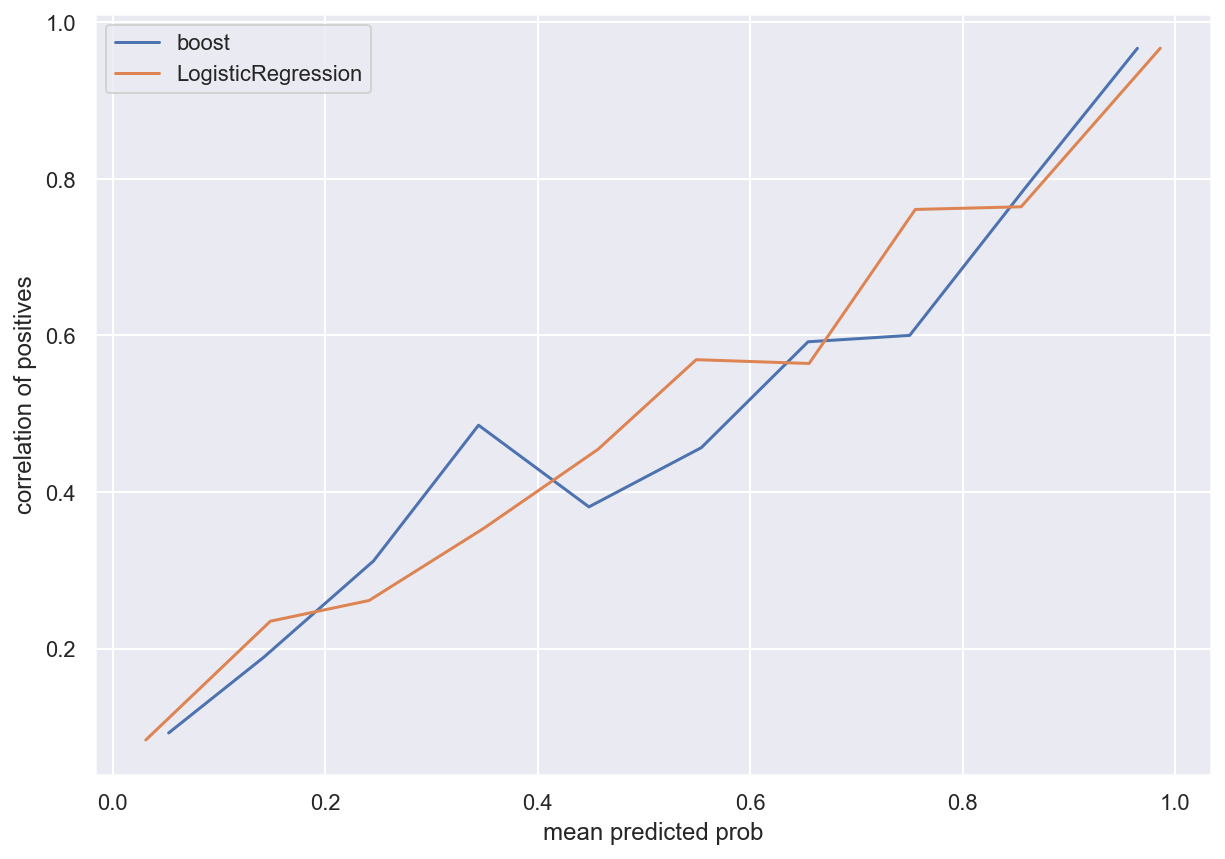

In [108]:
plt.plot(prob_pred_boost, prob_true_boost)
plt.plot(prob_pred_lr, prob_true_lr)
plt.legend(['boost', 'LogisticRegression'])
plt.xlabel('mean predicted prob')
plt.ylabel('correlation of positives')
plt.show()

Теперь попробуем оценить важность признаков для бустинга.

Поскольку наша базовая модель - это дерево из `sklearn`, мы можем вычислить важность признака отдельно для каждого дерева и усреднить (воспользуйтесь `feature_importances_` у `DecisionTreeRegressor`), после этого нормировать значения, чтобы они суммировались в единицу (обратите внимание, что они должны быть неотрицательными - иначе вы что-то сделали не так).

Допишите в вашей реализации бустинга функцию `feature_importances_` чтобы она возвращала описанные выше важности признаков.

Нарисуйте столбчатую диаграмму важности признаков. На соседнем графике нарисуйте важность признаков для логистической регрессии, для этого используйте модули весов. Сравните графики. Проанализируйте полученные результаты.

In [ ]:
# YOUR CODE:

Кстати, чаще всего излишние признаки могут вредить качеству бустинга. Попробуйте отфильтровать на основании диаграммы хвост наименее важных признаков и снова обучить модель (с теми же гиперпараметрами). Стало ли лучше?

In [ ]:
# YOUR CODE:

## Задание 5 (бонус). Блендинговое (1 балл)

Реализуйте блендинг над вашей лучшей моделью и логистической регрессией. Улучшилось ли качество?

In [ ]:
# YOUR CODE:

## Задание 6 (бонус). Катбустовое (1 балл)

Запустите [CatBoost](https://catboost.ai/en/docs/concepts/python-quickstart) на наших данных, сравните с вашей реализацией. Где получилось лучше?

подбор параметров оч долго ждать

In [105]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import roc_auc_score

def score(clf, x, y):
    return roc_auc_score(y == 1, clf.predict_proba(x)[:, 1])

train_data = x_train

train_labels = y_train

test_data = x_test

model = CatBoostClassifier(iterations=2,
                           depth=2,
                           learning_rate=1,
                           loss_function='Logloss',
                           verbose=True)

model.fit(x_train, y_train)

score(model, x_test, y_test)

0:	learn: 0.3802949	total: 2.85ms	remaining: 2.85ms
1:	learn: 0.3460435	total: 5.66ms	remaining: 0us


0.8939366862796655

## Социализационный бонус. Новогоднее 🎆 (0.5 балла)

Сфотографируйтесь с наряженной новогодней или рождественской ёлкой! Приложите фотографию, опишите свои впечатления, чего вы ждете от нового 2023 года?

Елка на даче ((